# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import norm
medical = pd.read_csv('insurance2.csv')

In [99]:
medical.shape

(1338, 8)

In [100]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0.5, 1.0, 'Distrubtion of charges')

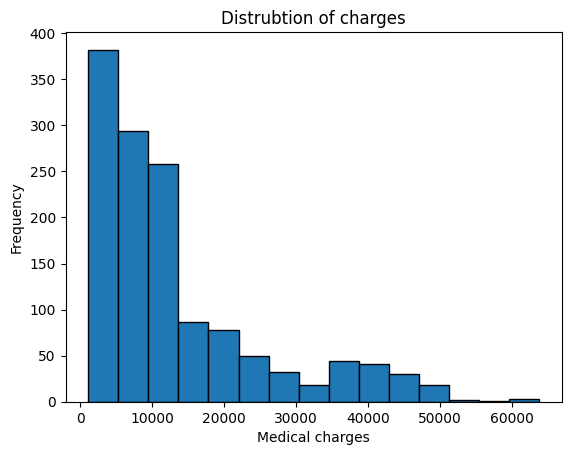

In [101]:
plt.hist(medical['charges'],edgecolor='black', bins=15)
plt.xlabel('Medical charges')
plt.ylabel('Frequency')
plt.title('Distrubtion of charges')

In [102]:
charge_mean = medical['charges'].mean()
charge_std = np.std(medical['charges'], ddof=1)
print("Mean of charges: ", charge_mean)
print("Standard deviation of charges: ", charge_std)

Mean of charges:  13270.422265141257
Standard deviation of charges:  12110.011236694001


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Since we have a random sample from the full population of hospital charges. This represents a percentage of the recent changes, so we treat the sample mean as an estimate of the population mean. 

Since we are testing if the mean is below the minimum threshold of $12,000, it is a one sample t/z is fine z-test here since n >= 30 (1338).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

A one sided interval is apporpriate here since the adminstrator wants to know if the sample mean is lower than the minium threshold of $12,000, wants to know the actual lower bound of the true mean.

In [103]:
n = len(medical)
z = norm.ppf(0.95)
print("Z value of: ", z)

standard_error = charge_std / np.sqrt(n)
print("Standard Error: ", standard_error)

margine_or_error = z * standard_error
print("Margin of error: ", margine_or_error)

lower_bound = charge_mean - margine_or_error
print("95% lower confidence bound: ", lower_bound)

Z value of:  1.6448536269514722
Standard Error:  331.0674543156824
Margin of error:  544.557502996741
95% lower confidence bound:  12725.864762144516


Since we are 95% confident that the true average charge is above $12,000 particularly $12,725, the adminstrator should not be conerned, we reject the null hypothesis is below $12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis: There is no difference in average charges

Alternative Hypothesis: There is a difference in average charges

We are assuming that the variance is equal when comparing two groups

In [104]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [105]:
# categorize the charges with claim and without|
insurance_claim = medical[medical['insuranceclaim'] == 1]['charges']
insurance_claim_no = medical[medical['insuranceclaim'] == 0]['charges']

# sample sizes
n0, n1 = len(insurance_claim), len(insurance_claim_no)
print("Claim insurance size:", n0)
print("No insurance size:", n1)
print()

# sample means
x0, x1 = insurance_claim.mean(), insurance_claim_no.mean()
print("Claim insurance mean:", x0)
print("No insurance mean:", x1)
print()

s0, s1 = insurance_claim.std(ddof=1), insurance_claim_no.std(ddof=1)
print("Claim insurance std:", s0)
print("No insurance std:", s1)

Claim insurance size: 783
No insurance size: 555

Claim insurance mean: 16423.928276537677
No insurance mean: 8821.421892306305

Claim insurance std: 14045.928418802134
No insurance std: 6446.510126811738


Calcuate pooled standard deviation

In [106]:
df = n0 + n1 - 2
sp = np.sqrt(((n0 - 1)*s0**2 + (n1 - 1)*s1**2) / (df))
print(sp)

11520.034268775262


Calculate t-test statistic

In [107]:
t_stat = (x0 - x1) / (sp*np.sqrt(1/n0 + 1/n1))
print(t_stat)

11.89329903087671


Plug into p value t-test statistic formula

In [108]:
p_val = 2 * (1- t.cdf(abs(t_stat), df))
print(p_val)

0.0


There is a 0% chance of seeing a difference like this, it is not by random chance, enough evidence to say that insured and uninsured people are charged different amounts, so we can reject the null hyopthesis.

In [109]:
from scipy.stats import ttest_ind

t, p = ttest_ind(insurance_claim, insurance_claim_no, equal_var=True)
print("t-statistic: ", t)
print("p-value: ", p)

t-statistic:  11.893299030876712
p-value:  4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

There is no built in z-test function like the ttest_ind() for t-test. Since z-test assumes population standard deviation wich is unlikely, but in most cases we only have the sample standard deviation, that why t-test is a better approach, hence why scipy.stats doesn't have a built in function.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test